In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc as odbc
import re
import random
import seaborn as sns
from dateutil.relativedelta import relativedelta

In [ ]:
# read excel into dataframe
df_Cardiac_Outcomes = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=None)
# read each sheet and store it in a dataframe
df_Hospitalization_Discharge = df_Cardiac_Outcomes["Hospitalization_Discharge"]
df_CardiacComplications = df_Cardiac_Outcomes["CardiacComplications"]
df_Responsiveness = df_Cardiac_Outcomes["Responsivenes"]
df_PatientHistory = df_Cardiac_Outcomes["PatientHistory"]
df_Labs = df_Cardiac_Outcomes["Labs"]
df_Demography = df_Cardiac_Outcomes["Demography"]
df_Patient_Precriptions = df_Cardiac_Outcomes["Patient_Precriptions"]

### Q1. How many patients were registered in each unique occupation?

In [ ]:
df_Demography["occupation"].fillna("NA", inplace=True)
patients_occupation = df_Demography['occupation'].value_counts()
patients_occupation

### Q2. Divide GCS scores into slabs of 5 and count the number of patients under each band of score. Show this as any graph of your choice

In [ ]:
#Method1
df_Responsiveness["GCS_Group"] = pd.cut(df_Responsiveness["GCS"],bins=5,labels=False)
df_GCSGroup_patients = df_Responsiveness.groupby("GCS_Group")["inpatient_number"].count()
fig = plt.figure(figsize=(10,5))
df_GCSGroup_patients.plot.pie(y=df_GCSGroup_patients.index)
plt.show()

In [ ]:
# Method2
df_Responsiveness["GCS_Group"] = pd.cut(df_Responsiveness["GCS"],bins=5,labels=False)
df_GCSGroup_patients = df_Responsiveness.groupby("GCS_Group")["inpatient_number"].count()
fig = plt.figure(figsize=(10,5))
df_GCSGroup_patients.plot.line()  
plt.show()

### Q3. Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you

In [ ]:
df_Hospitalization_Discharge['Discharge_date'] = pd.to_datetime(df_Hospitalization_Discharge['Admission_date']) + pd.to_timedelta(df_Hospitalization_Discharge['dischargeDay'], unit='D')
df_Hospitalization_Discharge[['Admission_date', 'dischargeDay','Discharge_date']]

### Q4. What percentage of patients had Biventricular heart failure?

In [ ]:
total_patients = len(df_CardiacComplications)
biventricular_patients = (df_CardiacComplications['type_of_heart_failure'] == 'Both').sum()
biventricular_percentage = (biventricular_patients / total_patients) * 100
print("Percentage of patients with Biventricular heart failure:", round(biventricular_percentage,2),'%')

### Q5. What is the ratio of patients who were responsive to pain vs responsive to sound?

In [ ]:
#Method 1:
print(round(len(df_Responsiveness.query("consciousness == 'ResponsiveToPain'"))/len(df_Responsiveness.query("consciousness == 'ResponsiveToSound'")),2))

In [ ]:
#Method 2:
Pivot_table = pd.pivot_table(df_Responsiveness, values='inpatient_number', columns=['consciousness'], aggfunc="count")
ratio=round(Pivot_table['ResponsiveToPain']/Pivot_table['ResponsiveToSound'],2)
print("Ratio of responsive_to_pain vs responsive_to_sound of",ratio)

### Q6.What was the average age group of the patients that had an outcome of 'Alive'?

In [ ]:
import statistics
df_patient_outcome_age = pd.merge(df_Hospitalization_Discharge[["inpatient_number","outcome_during_hospitalization"]], df_Demography[["inpatient_number","ageCat"]], on="inpatient_number")
df_patient_outcome_age = df_patient_outcome_age.query("outcome_during_hospitalization == 'Alive'")
alive_patients_age_group = df_patient_outcome_age['ageCat'].reset_index()
li_median_age=[]
dict_age = {}
for index,row in alive_patients_age_group.iterrows():
    li_age = (row["ageCat"]).split('-')
    median_age = (int(li_age[0])+int(li_age[1]))// 2
    li_median_age.append(median_age)
    if row["ageCat"] not in dict_age:
        dict_age[row["ageCat"]] = median_age
li_age_average = statistics.mean(li_median_age)
age_group = [key for key, val in dict_age.items() if val == int(li_age_average)]
print("The average age group of the patients that had an outcome of 'Alive':",age_group[0])

### Q7. Visualize missing data and missing patterns from Demography table using the "MissingNo" Library.

In [ ]:
pip install missingno

In [ ]:
#bar graph to show missing data
import missingno as msno
msno.bar(df_Demography,color="navy")
plt.show()

In [ ]:
# Matrix to show the missing patterns.
msno.matrix(df_Demography)
plt.show()

### Q8. Create a Waffle chart to show what percentage of total deaths belong to each admission_ward?

In [ ]:
pip install pywaffle

In [ ]:
from pywaffle import Waffle
df_deaths = df_Hospitalization_Discharge[df_Hospitalization_Discharge["outcome_during_hospitalization"] == "Dead"]
totaldeaths = len(df_deaths)
df_deaths = df_deaths.groupby("admission_ward")["inpatient_number"].count().reset_index()
df_deaths.rename({'inpatient_number': 'DeathCount'}, axis=1, inplace=True)
df_deaths["percentage_deaths"] = (df_deaths["DeathCount"]/df_deaths["DeathCount"].sum()) * 100
print(df_deaths)
fig = plt.figure(FigureClass = Waffle, rows = 10,columns = 10, vertical = True, values = df_deaths.percentage_deaths, labels = list(df_deaths.admission_ward),legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

### Q9. Create any 2 2-D arrays and perform matrix multiplication. Display the resulting array.

In [ ]:
array1 = np.array([[1, 1],[2, 2]])
array2 = np.array([[3, 3],[4, 4]])
result = np.dot(array1, array2);
print("Result for matrix multiplication:")
print(result)

### Q10. Display the percentage of missing values in each column in the table labs. Show the distribution as a bar graph

In [ ]:
# code to find percentage
import matplotlib.pyplot as plt
df_missingvalues = round(df_Labs.isnull().mean()*100,2)
fig = plt.figure(figsize = (20, 5))
plt.title('Percentage of Missing Values in Each Column (labs)')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
df_missingvalues.plot.bar(color='skyblue')
plt.show()

### Q11. A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print "YES" if it is a valid mobile number and "NO" if it is not on separate lines. Do not print the quotes. 
{2,9587456281,1252478965,7397260044}


In [ ]:
mob_numbers = {2,9587456281,1252478965,7397260044}
start_digit = [7,8,9]
for mobNo in mob_numbers:
    str_no = str(mobNo)
    if len(str_no) == 10 and int(str_no[0]) in start_digit:
         print(mobNo," is a valid mobile number")
    else:
        print(mobNo," is not a valid mobile number")

### Q12. If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what is the MAP of most patients with this condition?

In [ ]:
df_diastolicLV = df_CardiacComplications[["inpatient_number","left_ventricular_end_diastolic_diameter_LV"]].dropna()
df_diastolicLV = df_diastolicLV.query('left_ventricular_end_diastolic_diameter_LV > 5.6 | left_ventricular_end_diastolic_diameter_LV < 3.5')
df_map_analysis = pd.merge(df_diastolicLV[["inpatient_number","left_ventricular_end_diastolic_diameter_LV"]], df_Labs[["inpatient_number","map"]], on="inpatient_number")
print("No. of patients fall outside the limit:",len(df_map_analysis))
df_map_analysis = df_map_analysis.groupby("map")["inpatient_number"].count().reset_index()
df_map_analysis.rename({'inpatient_number': 'PatientsCount'}, axis=1, inplace=True)
print("MAP of most patients with this condition:")
print(df_map_analysis.loc[df_map_analysis['PatientsCount'].idxmax()])

### Q13. Create a bar chart between lengthofstay and body temperature, classified as: Hypothermia, within range or hyperthermia

In [ ]:
df_tempCategory =  df_Labs[["inpatient_number","body_temperature"]]
li_tempClassification = []
for index, row in df_tempCategory.iterrows():
    temp = row["body_temperature"]
    if temp > 37.5:
        li_tempClassification.append("Hyperthermia")
    elif temp >= 36.5 and temp <= 37.5:
        li_tempClassification.append("Within Range")
    elif temp < 36.5:
        li_tempClassification.append("Hypothermia")
df_tempCategory.insert(2, "TempClassification", li_tempClassification, True)
df_tempCategory_merge = pd.merge(df_Hospitalization_Discharge[["inpatient_number","dischargeDay"]], df_tempCategory[["inpatient_number","TempClassification"]], on="inpatient_number")
temp_classification_counts = df_tempCategory_merge.groupby('dischargeDay')['TempClassification'].value_counts().unstack(fill_value=0)
#plt.figure(figsize=(15,20))
temp_classification_counts.plot(kind='bar', stacked=True, colormap='Set3',figsize=(12,6))
plt.xlabel("Discharge Day")
plt.ylabel("count")
plt.title("Distribution of Temperature Classifications by Discharge Day")
plt.show()

### Q14. Find the list of patients whose DischargeDay is greater than the value given by the user

In [ ]:
user_discharge_day = int(input("Enter the value for DischargeDay: "))
patients_greater_than_value = df_Hospitalization_Discharge[df_Hospitalization_Discharge['dischargeDay'] > user_discharge_day]
list_of_patients = patients_greater_than_value['inpatient_number'].tolist()

print("List of patients whose DischargeDay is greater than", user_discharge_day, ":")
print(list_of_patients)

In [ ]:
user_input = input("Enter a positive number:")
df_Hospitalization_Discharge[df_Hospitalization_Discharge['dischargeDay'] > int(user_input)]

### Q15. Display a pie chart of number of patients in each category listed

-death_within_28_days
-re_admission_within_28_days
-death_within_3_months 
-re_admission_within_3_months 
-death_within_6_months 
-re_admission_within_6_months
-return_to_emergency_department_within_6_months

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
    
def patients_category():
    dict_classification = {}
    dict_classification["death_within_28_days"] = df_Hospitalization_Discharge.query("death_within_28_days == 1")["inpatient_number"].count()
    dict_classification["re_admission_within_28_days"] = df_Hospitalization_Discharge.query("re_admission_within_28_days == 1")["inpatient_number"].count()
    dict_classification["death_within_3_months"] = df_Hospitalization_Discharge.query("death_within_3_months == 1")["inpatient_number"].count()
    dict_classification["re_admission_within_3_months"] = df_Hospitalization_Discharge.query("re_admission_within_3_months == 1")["inpatient_number"].count()
    dict_classification["death_within_6_months"] = df_Hospitalization_Discharge.query("death_within_6_months == 1")["inpatient_number"].count()
    dict_classification["re_admission_within_6_months"] = df_Hospitalization_Discharge.query("re_admission_within_6_months == 1")["inpatient_number"].count()
    dict_classification["return_to_emergency_department_within_6_months"] = df_Hospitalization_Discharge.query("return_to_emergency_department_within_6_months == 1")["inpatient_number"].count()
    return dict_classification

dict_classification = patients_category()
cat_values = list(dict_classification.values())
cat_labels = list(dict_classification.keys())
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(cat_values, labels=cat_labels,autopct=make_autopct(cat_values),colors=sns.color_palette('Set2'))
plt.grid(False)
ax.set_title('No. of Patients in each category')
plt.show()

### Q16. Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid and BMI as columns, using melt functions

In [ ]:
df_CardiacComplications1=df_CardiacComplications[['inpatient_number','myocardial_infarction','congestive_heart_failure','peripheral_vascular_disease']]
melted_df = df_CardiacComplications1.melt(id_vars=['inpatient_number'], var_name='Row_name', value_name='value')
merge_table=pd.merge(melted_df[["inpatient_number","Row_name","value"]],df_Labs[["inpatient_number","uric_acid"]],on="inpatient_number")
merge_table_3rdtable=pd.merge(merge_table[["inpatient_number","Row_name","value","uric_acid"]],df_Demography[["inpatient_number","BMI"]],on="inpatient_number")
pd.pivot_table(merge_table_3rdtable, index=['Row_name'],values =['uric_acid','BMI'],aggfunc='mean')

### Q17. Using arrays and loops find the number of patients who were Admitted in the month of November

In [ ]:
# creating a list(array) to store values
li_NovAdmission = []

# reading patient number and admission date columns from Hospitalization_Discharge dataframe
df_patient_adm_time = df_Hospitalization_Discharge[["inpatient_number","Admission_date"]]
df_patient_adm_time = df_patient_adm_time.reset_index() 

# loopig to find the patients admitted in month of November
for index,row in df_patient_adm_time.iterrows():
    patientID = row["inpatient_number"]
    Adm_date = pd.to_datetime(row["Admission_date"])
    if pd.to_datetime(row["Admission_date"]).month == 11:
        li_NovAdmission.append(patientID)
        
print("Solution:")
print("Number of patients who were Admitted in the month of November:",len(li_NovAdmission))

### Q18. Create a heatmap on any columns of your choice including at least 1 lab value

In [ ]:
#Method 1
df_Labs_heatmap = df_Labs[["pulse","map"]]
plt.figure(figsize=(10,5))
sns.heatmap(data = df_Labs_heatmap, cmap = 'hsv')
plt.title('Heatmap of pulse and map', fontsize = 15)
plt.show() 

In [ ]:
#Method 2 - Show the top 5 records in the dataframe
df_Labs_heatmap = df_Labs[["pulse","map","systolic_blood_pressure","diastolic_blood_pressure"]].head(5)
plt.figure(figsize=(8,3))
sns.heatmap(data = df_Labs_heatmap, cmap = 'seismic')
plt.title('Heatmap of Lab Values of top 5 patients', fontsize = 15)
plt.show() 

### Q19. Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

In [ ]:
dict_data = {}
df_Demography["occupation"].fillna("NA", inplace=True)
unique_occupation = df_Demography["occupation"].unique()
for item in unique_occupation:
    df_occ = df_Demography[df_Demography["occupation"] == item]
    dict_data[item] = round(df_occ["BMI"].mean(),2)
occupation = list(dict_data.keys())
mean_BMI = list(dict_data.values())


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
patterns = ['**O', 'oO', 'O.O', '.||.','**','O.o']
bars_occ = plt.bar(occupation, mean_BMI,color="purple",width = 0.6,edgecolor='pink')
for bar,pattern in zip(bars_occ,patterns):
    bar.set_hatch(pattern)
plt.xlabel("Occupation")
plt.ylabel("Average BMI")
plt.title("Bar Graph to Show Average BMI based on Occupation of the patients")
plt.show()

### Q20. You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n . 
Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n. 
x=1, y=1, z=2, n-3

In [ ]:
x,y,z = 1,1,2
n = 3
print("All possible coordinates:")
for i in range(x+1):
    for j in range(y+1):
        for k in range(z+1):
            if i + j + k != 3:
                print(i,j,k)

### Q21.Given the names and grades for each student in a class of students, store them in a nested list and print the name(s) of any student(s) having the second lowest grade.
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]

In [ ]:
# Method 1
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]

# sort the list based on the 2nd item in the inner lists using sort function
python_students.sort(key = lambda item: item[1])
# store the second lowest grade
second_lowest_grade = python_students[2][1]

# iterate to find the result
print("Solution:")
print("Score and Names of students who has the second lowest score:",second_lowest_grade)
for name,mark in python_students:
    if mark == second_lowest_grade:
        print(name)
    elif mark > second_lowest_grade:
        break

In [ ]:
# Method 2
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]
# initialize dictionary to store values
dict_students = {}

# sort the list based on the 2nd item in the inner lists using sorted function
sorted_list = sorted(python_students, key=lambda item: item[1])

# store the second lowest grade
second_lowest_grade = sorted_list[2][1]

# iterate to find the result
print("Solution:")
print("Names of students who has the second lowest score:",second_lowest_grade)
for name,mark in python_students:
    if mark not in dict_students:
        dict_students[mark] = [name]
    else:
        dict_students[mark].append(name)

dict_students.get(second_lowest_grade)

### Q22. Which patient was on the most number of prescribed drugs? What was his age and outcome?

In [ ]:
# initialize dict
dict_patient_drugs = {}
for index,row in df_Patient_Precriptions.iterrows():
    if row["inpatient_number"] not in dict_patient_drugs:
        dict_patient_drugs[row["inpatient_number"]] = 1
    else:
        dict_patient_drugs[row["inpatient_number"]] += 1
# sort dict based on values
sort_dict = sorted(dict_patient_drugs.items(), key=lambda item: item[1])
# code to find the patient who is taking max drugs
patient_maxDrugs = sort_dict[-1][0]
print("Patient on the most number of drugs: ",patient_maxDrugs)
# code to find Age Category of the patient
patient_AgeCat = df_Demography.loc[df_Demography["inpatient_number"] == patient_maxDrugs, "ageCat"].iloc[0]
print("Age: ", patient_AgeCat)
# code to find the outcome of the patient
outcome = df_Hospitalization_Discharge.loc[df_Hospitalization_Discharge["inpatient_number"] == patient_maxDrugs, "outcome_during_hospitalization"].iloc[0]
print("Outcome: ", outcome)

### Q23. How many patients were prescribed Digoxin?

In [ ]:
# Method 1
# read details from Patient_Precriptions data frame 
df_Digoxin_tablet = df_Patient_Precriptions[df_Patient_Precriptions["Drug_name"] == "Digoxin tablet"]
print("Solution:")
print("Number of patients were prescribed Digoxin:", df_Digoxin_tablet.shape[0])

In [ ]:
# Method 2
# read details from Patient_Precriptions data frame 
df_Digoxin_tablet = df_Patient_Precriptions[df_Patient_Precriptions["Drug_name"] == "Digoxin tablet"]
li_Digoxin_Patients = []
for index, row in df_Digoxin_tablet.iterrows():
    if row["inpatient_number"] not in li_Digoxin_Patients:
        li_Digoxin_Patients.append(row["inpatient_number"])

print("Solution:")
print("Number of patients were prescribed Digoxin:", len(li_Digoxin_Patients))

### Q24. What columns indicate a prescence of anemia? Create a severity score for anemia and prove or disprove a correlation to Length of stay

#### Note:
##### Considering the hemoglobin range to find the severity score for Anemia:

###### above-normal : > 170(99)
###### normal:130 to 170(0)
###### Mild: Hemoglobin 10.0 g/dL to lower limit of normal - 100 to 129(1)
###### Moderate: Hemoglobin 8.0 to 10.0 g/dL - 80 to 99(2)
###### Severe: Hemoglobin 6.5 to 7.9 g/dL[1] - 65 to 79(3)
###### Life-threatening: Hemoglobin less than 6.5 g/dL - < 65(4)
###### Since we need to find correlation between Anemia and Length of Stay - we have considered severity score from 1 to 4.

In [ ]:
print("red_blood_cell,Hemoglobin,Hematocrit - columns indicate a presence of Anemia.")
print("-----------------------------------------------------------------------------")
# function to find severity score for anemia
def severity_score():
    li_AnemiaSeverity = []
    df_hemoglobin_severity = df_Labs.loc[:,["inpatient_number","hemoglobin"]]
    for index,row in df_hemoglobin_severity.iterrows():
        hemo_value = row["hemoglobin"]
        if pd.isnull(row["hemoglobin"]) or int(hemo_value) > 170:
            li_AnemiaSeverity.append(99)
        elif (hemo_value >= 130 and hemo_value <= 170):
            li_AnemiaSeverity.append(0)
        elif hemo_value >= 100 and hemo_value <= 129:
            li_AnemiaSeverity.append(1)
        elif hemo_value >= 80 and hemo_value <= 99:
            li_AnemiaSeverity.append(2)
        elif hemo_value >= 65 and hemo_value <= 79:
            li_AnemiaSeverity.append(3)
        else:
            li_AnemiaSeverity.append(4)
    df_hemoglobin_severity["AnemiaSeverity"] = li_AnemiaSeverity
    # returning only the Anemia patients
    return df_hemoglobin_severity.query("AnemiaSeverity >= 1 & AnemiaSeverity <= 4")

def correlation_Anemia_LengthofStay(df_corr):
    # finding co-relation between anemia and length of stay. Considering "dischargeDay" column for Length of stay
    df_corr = pd.merge(df_Hospitalization_Discharge[["inpatient_number","dischargeDay"]], df_corr[["inpatient_number","AnemiaSeverity"]], on="inpatient_number")
    df_corr.rename({'dischargeDay': 'Length_of_Stay'}, axis=1, inplace=True)
    cor_value = df_corr["Length_of_Stay"].corr(df_corr["AnemiaSeverity"])
    cor_result = ""
    if cor_value > 0.7:
        cor_result = "Strong positive correlation between Anemia and Length of Stay"
    elif cor_value > 0.3:
        cor_result = "Moderate positive correlation between Anemia and Length of Stay"
    elif cor_value > 0:
        cor_result = "Weak positive correlation between Anemia and Length of Stay"
    elif cor_value == 0:
        cor_result = "No correlation between Anemia and Length of Stay"
    elif cor_value > -0.3:
        cor_result = "Weak negative correlation between Anemia and Length of Stay"
    elif cor_value > -0.7:
        cor_result = "Moderate negative correlation between Anemia and Length of Stay"
    else:
        cor_result = "Strong negative correlation between Anemia and Length of Stay."
    print("Corelation Value: ",cor_value, ".So it is: ", cor_result)
    print("-----------------------------------------------------------------------------")
    print("Correlation Chart:")
    ax = sns.heatmap(df_corr[["Length_of_Stay","AnemiaSeverity"]].corr(), annot=True)

# function call to find severity score
df_hemoglobin_severity = severity_score()
# function call to find correlation
correlation_Anemia_LengthofStay(df_hemoglobin_severity)


### Q25.Using GCS score, how many patients are considered to be in a coma?

In [ ]:
# Method 1
# As per wikipedia, Patients with scores of 3 to 8 are usually considered to be in a coma.
df_Coma = df_Responsiveness[df_Responsiveness["GCS"] <= 8]
print("Number of patients considered to be in coma: ", len(df_Coma))

In [ ]:
#Method 2
li_coma_patients = []
df_patient_GCS = df_Responsiveness[["inpatient_number","GCS"]]
for index, row in df_patient_GCS.iterrows():
    if row["GCS"] <= 8:
        li_coma_patients.append(row["inpatient_number"])
print("Number of patients considered to be in coma: ",len(li_coma_patients))

### Q26. Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [ ]:
# code to generate random age based on Age Category and to a list
li_rand_age = []
df_Demography_ageCat = df_Demography["ageCat"]
df_Demography_ageCat = df_Demography_ageCat.reset_index()
for index,row in df_Demography_ageCat.iterrows():
    li_age = (row["ageCat"]).split('-')
    rand_age = random.randrange(int(li_age[0]),int(li_age[1]))
    li_rand_age.append(rand_age)
# add new column to the Demography dataframe
df_Demography["Age"] = li_rand_age
# find the average of the newly added age column
avg_age = round(df_Demography["Age"].mean(),2)
print("The average age of the patients: ", avg_age)

### Q27. Using the age column generated in Q.26, calculate year of birth for each patient

In [ ]:
year_of_birth = []
df_patient_birthYear = pd.merge(df_Hospitalization_Discharge[["inpatient_number","Admission_date"]], df_Demography[["inpatient_number","Age"]], on="inpatient_number")
for index,row in df_patient_birthYear.iterrows():
    adm_year = pd.to_datetime(row["Admission_date"]).year
    birth_year = adm_year - row["Age"]
    year_of_birth.append(birth_year)

df_Demography["Year_of_Birth"] = year_of_birth
print(df_Demography[["inpatient_number","ageCat","Age","Year_of_Birth"]])

### Q28.Store patient number and gender in a dictionary as a pair of values. Show the first 10 values

In [ ]:
# initialize a dictionary to store values
dict_patient_gender = {}

df_patient_gender = pd.DataFrame(df_Demography, columns=["inpatient_number","gender"])
# read the data and store it in dict
for index, row in df_patient_gender.iterrows():
    dict_patient_gender[row["inpatient_number"]] = row["gender"]

# convert the dict to list and show the first 10 items. The output will be tuples inside a list
print("Solution:")
print("First 10 Patient Number and their Gender")
print(list(dict_patient_gender.items())[:10])

### Q29. What percentage of those in a coma also have diabetes?

In [ ]:
# Method 1
diabetic_count = 0
for index,row in df_Coma.iterrows():
    is_diabetic = df_PatientHistory.loc[df_PatientHistory["inpatient_number"] == row["inpatient_number"], "diabetes"].iloc[0]
    if is_diabetic:
        diabetic_count += 1
        
print("Number of patients considered to be in coma: ",len(df_Coma))
print("Number of diabetic patients considered to be in coma: ",diabetic_count)
percent_value = round(diabetic_count/len(df_Coma) * 100,2)
print("Percentage of those in a coma also have diabetes: ", str(percent_value) + "%")

In [ ]:
# Method 2
# using coma patients list from Q.25
diabetic_count = 0
for patient in li_coma_patients:
    is_diabetic = df_PatientHistory.loc[df_PatientHistory["inpatient_number"] == patient, "diabetes"].iloc[0]
    if is_diabetic:
        diabetic_count += 1
        
print("Number of patients considered to be in coma: ",len(li_coma_patients))
print("Number of diabetic patients considered to be in coma: ",diabetic_count)
percent_value = round(diabetic_count/len(li_coma_patients) * 100,2)
print("Percentage of those in a coma also have diabetes: ", str(percent_value) + "%")


### Q30. Identify any columns relating to echocardiography and create a severity score for cardiac function. Compare this outcome and show average severity score for each outcome

In [ ]:
df_echocardiography_cardiacfn = df_CardiacComplications[["inpatient_number","LVEF"]].dropna()

def severityScore_cardiacfn(df_echocardiography_cardiacfn):
    li_severityscore = []
    for index,row in df_echocardiography_cardiacfn.iterrows():
        LVEF_value = row["LVEF"]
        if LVEF_value >= 55:
            li_severityscore.append(0)
        elif LVEF_value >= 40 and LVEF_value <= 54:
            li_severityscore.append(1)
        elif LVEF_value >= 30 and LVEF_value <= 39:
            li_severityscore.append(2)
        elif LVEF_value < 30:
            li_severityscore.append(3)
    df_echocardiography_cardiacfn["CardiacFunction_Severity"] = li_severityscore
    return df_echocardiography_cardiacfn

df_sevScore = severityScore_cardiacfn(df_echocardiography_cardiacfn)
df_outcome = df_corr = pd.merge(df_sevScore[["inpatient_number","CardiacFunction_Severity"]], df_Hospitalization_Discharge[["inpatient_number","outcome_during_hospitalization"]], on="inpatient_number")
print(df_outcome.groupby("outcome_during_hospitalization")["CardiacFunction_Severity"].mean())

### Q31. Group the days to re-admission into bins and count how many patients were in each bin

In [ ]:
df_readmission = df_Hospitalization_Discharge[["inpatient_number","readmission_time_days_from_admission"]].dropna()
df_readmission.rename({'readmission_time_days_from_admission': 'readmission_days'}, axis=1, inplace=True)
df_readmission['bins'] = pd.cut(x=df_readmission['readmission_days'], bins=10)
df_readmission = df_readmission.groupby(['bins'])['inpatient_number'].count().reset_index()
df_readmission.rename({'inpatient_number': 'PatientsCount'}, axis=1, inplace=True)
df_readmission

### Q32. Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge

In [ ]:
df_new_group = df_Hospitalization_Discharge.loc[:, ['inpatient_number','admission_ward','admission_way']]
df_new_group['admission_ward_way'] = df_new_group[["admission_ward", "admission_way"]].apply("-".join, axis=1)
df_result = df_new_group.groupby('admission_ward_way')['inpatient_number'].count()
explode = (0, 0.2, 0, 0,0,0,0,0)  
plot = df_result.plot.pie(subplots=True, figsize=(11, 6),label="", explode = explode,shadow = True)
plt.show()

### Q33.Retrieve the row with minimum white_blood_cell count using sorting technique.

In [ ]:
#Method 1
df_Labs.sort_values(by='white_blood_cell',ascending=True, kind='quicksort').head(1)

In [ ]:
#Method 2
df_Labs.sort_values('white_blood_cell', ascending=True).iloc[0]

### Q34. get the last letter of discharge_department of patients using RegEX

In [ ]:
department = df_Hospitalization_Discharge['discharge_department']
print(type(department))
for dept in department:
    lastChar = re.findall(r"\w$", dept)
    print(lastChar[0])

### Q35.find the way to reverse string for given input (eg: input : This hackathon is about cardiac outcomes: outcomes cardiac about is hackathon This)

In [ ]:
string ="This hackathon is about cardiac outcomes"
# reversing words in a given string
splitstring = string.split()[::-1]
listword = []
for word in splitstring:
    listword.append(word)
print(" ".join(listword))

### Q36. Use the QB style library to create any multidimensional arrays.Create a figure object called fig using plt.figure() **
** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
** Plot (x,y) on that axes and set the labels.

In [ ]:
pip install qbstyles

In [ ]:
from qbstyles import mpl_style
mpl_style(dark=True)
multi_arr1 = np.array([[1,2],[3,4]])
multi_arr2 = multi_arr1**2
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax = plt.plot(multi_arr1, multi_arr2)
plt.grid(False)
plt.title('Exploring fig,axes')
plt.xlabel("Array 1")
plt.ylabel("Array 2")
plt.show()

### Q37.Using dischargeDay values print even if it even number and odd if it odd number

In [ ]:
discharge=df_Hospitalization_Discharge['dischargeDay']
for row_value in discharge:
    if row_value%2 == 0:
        print(row_value,"is an even number")
    else:
        print(row_value,"is an odd number")

### Q38. find the length of Tuple for any given input (Hint: Input a string from user )

In [ ]:
#taking a input from user and converting as tuple.
input_string=tuple(input('Enter the string: ').split(' '))
print("The length of tuple: ",len(input_string))

### Q39. Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

In [ ]:
x = np.arange(0, 10,0.1) 
y = np.sin(np.pi * x) + x 
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
    # Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### Q40. Select 25 different random values between 200 to 800.

In [ ]:
#Method 1
random_list = random.sample(range(200, 800), 25)
print(random_list)

In [ ]:
#Method 2
randomlist = []
for i in range(25):
    num = random.randint(200,800)
    randomlist.append(num)
print(randomlist)

### Q41.Plot the time series of Admission dates with count of patients. The X-Axis should be for every 5 months

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('Error: A warning just appeared')

In [ ]:
li_startdate=[]
li_enddate=[]
li_patient_count = []
min_date = df_Hospitalization_Discharge['Admission_date'].min()
max_date = df_Hospitalization_Discharge['Admission_date'].max()
while min_date<= max_date:
    future_date = min_date+ relativedelta(months=5)
    li_startdate.append(min_date)
    end_date = future_date- relativedelta(days=1)
    li_enddate.append(end_date)
    df_patient_count = df_Hospitalization_Discharge[(df_Hospitalization_Discharge['Admission_date'] >= min_date) & (df_Hospitalization_Discharge['Admission_date']<=end_date)]
    li_patient_count.append(len(df_patient_count))
    min_date=future_date
df=pd.DataFrame()
df['start_date']= li_startdate
df['end_date']=li_enddate
df['patient_count']=li_patient_count
print(df)
plt.figure(figsize=(10, 4))
fig=sns.lineplot(x = df['start_date'], y = df['patient_count'], data = df) 
ticks, labels = plt.xticks()
#plt.xticks(ticks[::2], labels[::5])
fig.set(xlabel ="Every 5 Month", ylabel = "patients Count", title = 'Patients admission on every 5 month')

### Q42. np.arange(1,21).reshape(4,5), find array slicing to get the elements 1,2,8,19. 
When the value is less than 9, print as 0,else print 1

In [ ]:
arr=np.arange(1,21).reshape(4,5)
slicing=(arr[0:1,0:2])
slicing=np.append(slicing,arr[1,2])
slicing=np.append(slicing,arr[3,3])
for i in slicing:
    if i<9:
        print("0")     
    else:
        print("1")

### Q43. Give Distribution chart of max Killip_grade

In [ ]:
# Distribution chart of max Killip_grade
max_killip_grade=(df_CardiacComplications[df_CardiacComplications.Killip_grade == df_CardiacComplications.Killip_grade.max()])
sns.distplot(max_killip_grade['Killip_grade'])

In [ ]:
## Distribution chart of Killip_grade
sns.distplot(df_CardiacComplications['Killip_grade'],kde=True,bins=10)

### Q44.Based on Q26 and 27 display all demographic details of patients who are born in year 1945

In [ ]:
demography_1945_born = df_Demography.query("Year_of_Birth == 1945")
demography_1945_born

### Q45. Create a dataframe with date and time as columns, where the values are the admission time

In [ ]:
df_adm_date_time = pd.DataFrame()
df_adm_date_time["Admission_date"]= df_Hospitalization_Discharge['Admission_date']
df_adm_date_time["date_only"]= df_adm_date_time['Admission_date'].dt.date
df_adm_date_time["time_only"]= df_adm_date_time['Admission_date'].dt.time
df_adm_date_time

### Q46. Convert occupation into numeric by Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_Demography['occupation'].unique()
label_encoder = LabelEncoder()
df_Demography['occupation'] = label_encoder.fit_transform(df_Demography['occupation'])
df_Demography

### Q47. Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.

In [ ]:
print("Fixed values 3x3 Array using Random values of 1 to 9 :")
np.random.seed(1)
np.random.randint(1,9, size = (3,3))

### Q48. Using loops, create a multiplication table for the number 7

In [ ]:
print("Multiplication Table for number 7")
times_table = 7
for i in range(1,13):
    print(f"{i} x {times_table} = {i*times_table}", end="\n")

### Q49. Connect to sql and write a query to find all patients who have a gender of 'Male' ( Attach screenshots for this question)

In [ ]:
SERVER = 'AKCOMPUTER\MSSQLSERVER2022'
DATABASE = 'Cardiac_Outcomes'
USERNAME = 'sa'
PASSWORD = 'sql123$'
connectionString = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes; UID={USERNAME};PWD={PASSWORD}'
conn = odbc.connect(connectionString)
#Querying data temp data 
SQL_QUERY = """select * from [dbo].[Demography] where gender ='male'"""
cursor = conn.cursor()	
cursor.execute(SQL_QUERY) 
row = cursor.fetchone() 
while row:
    print (row) 
    row = cursor.fetchone()
cursor

#### Screenshot of Q49

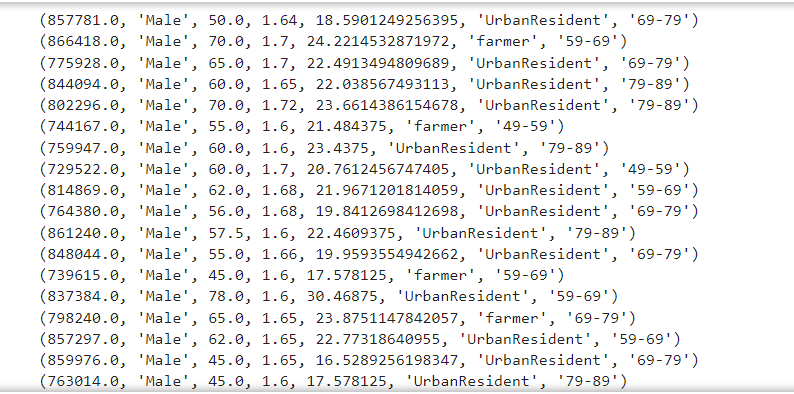

### Q50. Display the lab details of the patient with maximum pulse using the .loc

In [ ]:
max_pulse_lab_values= df_Labs.loc[df_Labs['pulse'].idxmax()]
max_pulse_lab_values

### Q51. Display a violin chart to show distribution of Pulse Rate against age.

In [ ]:
# Method 1:
#Violin chart with Age category Column
merge_table = pd.merge(df_Labs[["inpatient_number","pulse"]], df_Demography[["inpatient_number","ageCat"]], on="inpatient_number")
plt.figure(figsize=(20, 10))
mpl_style(dark=False)
sns.violinplot(data=merge_table, x="pulse", y="ageCat")

In [ ]:
# Method 2:
#Violin chart with Age Column
merge_table = pd.merge(df_Labs[["inpatient_number","pulse"]], df_Demography[["inpatient_number","Age"]], on="inpatient_number")
plt.figure(figsize=(30, 10))
mpl_style(dark=False)
sns.violinplot(data=merge_table, x="pulse", y="Age",palette="Set2")
plt.show()

### Q52. Create a Point Plot on Age against time to readmission.

In [ ]:
# Age Column agaist readmission
df_merged = pd.merge(df_Hospitalization_Discharge[["inpatient_number","readmission_time_days_from_admission"]], df_Demography[["inpatient_number","Age"]], on="inpatient_number")
plt.figure(figsize=(20, 10))
sns.pointplot(data=df_merged, x="Age", y="readmission_time_days_from_admission")

In [ ]:
# AgeCateogory Column agaist readmission
df_merged = pd.merge(df_Hospitalization_Discharge[["inpatient_number","readmission_time_days_from_admission"]], df_Demography[["inpatient_number","ageCat"]], on="inpatient_number")
plt.figure(figsize=(20, 10))
sns.pointplot(data=df_merged, x="ageCat", y="readmission_time_days_from_admission")

### Q53. What is the correlation between CCI score and outcome?

In [ ]:
merge_table = pd.merge(df_PatientHistory[["inpatient_number","CCI_score"]], df_Hospitalization_Discharge[["inpatient_number","outcome_during_hospitalization"]], on="inpatient_number")
pivot_outcome = pd.get_dummies(merge_table)
sns.heatmap(pivot_outcome[['CCI_score','outcome_during_hospitalization_Alive','outcome_during_hospitalization_Dead','outcome_during_hospitalization_DischargeAgainstOrder']].corr());
pivot_outcome[['CCI_score','outcome_during_hospitalization_Alive','outcome_during_hospitalization_Dead','outcome_during_hospitalization_DischargeAgainstOrder']].corr()

### Q54. For all non-negative integers that are also even numbers in the array [0,1,2,6,8] print i*i

In [ ]:
array = [0,1,2,6,8,9]
even_squares = []
for i in array:
    if ((i>=0) & (i % 2) == 0):
        even_squares.append(i)
        print(i*i)

### Q55.Create a jointplot on diastolic_blood_pressure & length of stay

In [ ]:
merge_table = pd.merge(df_Hospitalization_Discharge[["inpatient_number","dischargeDay"]], df_Labs[["inpatient_number","diastolic_blood_pressure"]], on="inpatient_number",how='inner')
sns.jointplot(data=merge_table, x="diastolic_blood_pressure", y="dischargeDay")
plt.show()

### Q56. Using loc, retrieve the agegroup and weight between indices 101 and 201.

In [ ]:
df_Demography.loc[101:201,['ageCat','weight']]

### Q57. Create a pivot table show shows outcome type as rows, the admission_ward as columns and counts of patients in each category as values

In [ ]:
pivot_table_admission = pd.pivot_table(
    df_Hospitalization_Discharge,
    values='inpatient_number',  
    index='outcome_during_hospitalization',  
    columns='admission_ward',  
    aggfunc='count'  
)
pivot_table_admission

### Q58. Use Hexagonal binning to show the density of patients who were readmitted when compared to Discharge Days

In [ ]:
plt.hexbin(df_Hospitalization_Discharge["dischargeDay"], df_Hospitalization_Discharge["readmission_time_days_from_admission"], gridsize = 5, cmap ='Greens')  
plt.title('Hexagonal binning to show the density of patients')  
plt.show()

### Q59. Using Sunburst chart display patients Age group, occupation and BMI Group

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px 
df_Demography["occupation"].fillna("NA", inplace=True)  
fig=px.sunburst(data_frame=df_Demography,path=["ageCat","occupation","BMI"] ,width=500,height=500)
fig.show()

### Q60. Plot the Density Chart for visit times

In [ ]:
df_Hospitalization_Discharge.visit_times.plot.density(color='green') 
plt.title('Density plot for visit times') 
plt.show()

### Q61. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [ ]:
array_elements= np.arange(1, 31).reshape(6, 5)

desired_elements = array_elements[2:4, 0:2]
print(desired_elements)

### Q62. What % of all patients with an outcome of "Alive" died within 28 days. What was the mean platelet volume among this group?

In [ ]:
df_alive=df_Hospitalization_Discharge.query('outcome_during_hospitalization=="Alive"')
df_died_within_28days=df_alive.query('death_within_28_days==1')
perc_within_28_days=(len(df_died_within_28days)/len(df_alive))*100
print("Percentage of all patients with an outcome of Alive died within 28 days: ",round(perc_within_28_days,2),"\n")
merge_table=pd.merge(df_died_within_28days[["inpatient_number"]],df_Labs[["inpatient_number","mean_platelet_volume"]],on="inpatient_number")
print("Mean platelet volume among this group",round(merge_table['mean_platelet_volume'].mean(),2))
merge_table

### Q63. find the patients who have 'h' in their DestinationDischarge and print them

In [ ]:
df_Hospitalization_Discharge[(df_Hospitalization_Discharge['DestinationDischarge'].str.contains('h'))][['inpatient_number','DestinationDischarge']]

### Q64. Create a grouped bar chart that shows number of patients by gender and ageCat

In [ ]:
df_age_gender_patients =  df_Demography.groupby(["ageCat","gender"])['inpatient_number'].count().reset_index()
df_male = df_age_gender_patients.query('gender == "Male"')
df_female = df_age_gender_patients.query('gender == "Female"')
male = df_male["inpatient_number"].tolist()
female = df_female["inpatient_number"].tolist()
age_category = df_age_gender_patients["ageCat"].unique().tolist()
x = np.arange(len(age_category))
width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, male, width, label='Male')
bar2 = ax.bar(x + width/2, female, width, label='Female')
# adding labels
ax.set_ylabel('Number of Patients')
ax.set_title('Number of Patients')
ax.set_xticks(x)
ax.set_xticklabels(age_category)
ax.legend()
def autolabel(rects):
    """Attaching a text label above each bar in bar1,bar2, displaying its value."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bar1)
autolabel(bar2)
fig.tight_layout()
plt.show()

### Q65. Which Admission Ward has maximum number of visits scheduled

In [ ]:
#Method1
Count_of_visit_Schedule=df_Hospitalization_Discharge.groupby(['admission_ward'])['visit_times'].sum()
Count_of_visit_Schedule.sort_values(axis=0,ascending=False).head(1)

In [ ]:
#Method2
df_maxVisits = df_Hospitalization_Discharge.groupby("admission_ward")["visit_times"].sum().reset_index()
print(df_maxVisits.loc[df_maxVisits['visit_times'].idxmax()])

### Q66. Display total count of patients in each discharge_department based on gender

In [ ]:
merged_df = pd.merge(df_Hospitalization_Discharge, df_Demography, on='inpatient_number')
Total_departments_discharge_gender = merged_df.groupby(['discharge_department', 'gender']).size().reset_index(name='total_count')
print(Total_departments_discharge_gender)

In [ ]:
df1 = pd.merge(df_Hospitalization_Discharge[["inpatient_number","discharge_department"]], df_Demography[["inpatient_number","gender"]], on="inpatient_number")
df1.groupby(["discharge_department","gender"])["inpatient_number"].count()

### Q67. How many Unique patients were precribed each type of medication?

In [ ]:
Unique_patients_same_medication = df_Patient_Precriptions.groupby('Drug_name')['inpatient_number'].nunique().reset_index()
Unique_patients_same_medication = Unique_patients_same_medication.rename(columns={'inpatient_number': 'unique_patients'})
print(Unique_patients_same_medication)

### Q68. Find 5 patients with the highest Discharge days greater than 20. List their most common outcome

In [ ]:
high_discharge_days = df_Hospitalization_Discharge[df_Hospitalization_Discharge['dischargeDay'] > 20]
Top5_patients=high_discharge_days.sort_values(by="dischargeDay",ascending=False).head(5)
print(Top5_patients.loc[:,["inpatient_number", "dischargeDay","outcome_during_hospitalization"]])

### Q69. Get the list of patient ID's which are not there in prescriptions but in demographics

In [ ]:
#Method1
df_allpatients = df_Demography.merge(df_Patient_Precriptions, on='inpatient_number',
                   how='left', indicator=True)
df1_notinPrecriptions = df_allpatients[df_allpatients['_merge'] == 'left_only']
df1_notinPrecriptions

In [ ]:
#Method2:
df_Demo_Patients = df_Demography["inpatient_number"].unique()
df_Pres_Patients = df_Patient_Precriptions["inpatient_number"].unique()
np.setdiff1d(df_Demo_Patients, df_Pres_Patients)

### Q70. On average, what is the most frequent weekday of admission?

In [ ]:
df_mostadm_day = df_Hospitalization_Discharge[["inpatient_number","Admission_date"]]
df_mostadm_day["Adm_Day"] = pd.to_datetime(df_Hospitalization_Discharge['Admission_date']).dt.day_name()
df_mostadm_day = df_mostadm_day.groupby("Adm_Day")["inpatient_number"].count().reset_index()
df_mostadm_day.rename({'inpatient_number': 'AdmCount'}, axis=1, inplace=True)
df_mostadm_day = df_mostadm_day.query("Adm_Day != 'Saturday' & Adm_Day != 'Sunday'").sort_values(by="AdmCount", ascending=False)
df_mostadm_day.head(1)

### Q71. Which year had the maximum admissions

In [ ]:
df_admissionYear = pd.to_datetime(df_Hospitalization_Discharge['Admission_date']).dt.year
ad = df_admissionYear.value_counts().idxmax()
print("year of max admissions:",ad)

In [ ]:
df_Hospitalization_Discharge['Year'] = df_Hospitalization_Discharge['Admission_date'].dt.strftime('%Y')
groupby_year =  df_Hospitalization_Discharge.groupby(['Year'])["inpatient_number"].count().reset_index()
#print(groupby_year)
print(groupby_year.loc[groupby_year['inpatient_number'].idxmax()])

### Q72. What % of the dataset is male vs female?

In [ ]:
gender_counts = df_Demography['gender'].value_counts()
total_count = len(df_Demography)
male_percentage = (gender_counts.get('Male', 0) / total_count) * 100
female_percentage = (gender_counts.get('Female',0) / total_count) * 100
print("Male percentage:", male_percentage)
print("Female percentage:", female_percentage)

### Q73. Which patient in the youngest age category weighs the most?

In [ ]:
age_category= df_Demography['ageCat'].min()
print("youngest age category",age_category)
patients_age = df_Demography[df_Demography['ageCat'] == age_category]
#print("df",patients_age)
max_weight = patients_age['weight'].max()
print("max weight of youngest age:",max_weight)
inpatient_for_max_weight = patients_age.loc[patients_age['weight'] == max_weight, 'inpatient_number'].iloc[0]
print("patient in the youngest age category weighs the most:",inpatient_for_max_weight)

### Q74. Which adm ward had the lowest rate of Outcome Death?

In [ ]:
df_admward_outcome = df_Hospitalization_Discharge[["inpatient_number","admission_ward","outcome_during_hospitalization"]].query("outcome_during_hospitalization == 'Dead'")
df_admward_outcome = df_admward_outcome.groupby("admission_ward")["inpatient_number"].count().reset_index()
df_admward_outcome.rename({'inpatient_number': 'Count'}, axis=1, inplace=True)
min_count = df_admward_outcome["Count"].min()
print(df_admward_outcome[df_admward_outcome['Count'] == min_count])

### Q75. What % of those with an outcome of death, had myocardial infarction?

In [ ]:
filter_dead_outcome=df_Hospitalization_Discharge.query("outcome_during_hospitalization == 'Dead'")
merge_table = pd.merge(filter_dead_outcome[["inpatient_number","outcome_during_hospitalization"]], df_CardiacComplications[["inpatient_number","myocardial_infarction"]], on="inpatient_number")
myocardial_infarction_dead_count=merge_table.query("myocardial_infarction == 1")
perc_myocardial_infarction = (len(myocardial_infarction_dead_count)/len(filter_dead_outcome))*100
print("Percentage of those with an outcome of death, had myocardial infarction:",round(perc_myocardial_infarction,2))

### Q76. What is the ratio of those with congestive heart failure to those who had type of heart failure Both?

In [ ]:
congestive_heart_failure=df_CardiacComplications[df_CardiacComplications['congestive_heart_failure']==1].count()
congestive1=congestive_heart_failure['congestive_heart_failure']
type_of_heart_failure=df_CardiacComplications[df_CardiacComplications['type_of_heart_failure']=='Both'].count()
both1=type_of_heart_failure['type_of_heart_failure']
ratio = congestive1/both1
print("Ratio of those with congestive heart failure to those who had type of heart failure Both = ",round(ratio,2))

### Q77. LIst the number of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score(higher risk of death) 


In [ ]:
df_severeGCS = df_Responsiveness.query("GCS <= 8")
df_outcome = pd.merge(df_severeGCS[["inpatient_number","GCS"]], df_Hospitalization_Discharge[["inpatient_number","outcome_during_hospitalization"]], on="inpatient_number")
df_outcome

### Q78. Give the count of patients who have experinced tachicardia or bradycardia.

In [ ]:
##Tachycardia: Resting heart rate above 100 beats per minute (bpm).
##Bradycardia: Resting heart rate below 60 beats per minute (bpm).

tachicardia=df_Labs[df_Labs['pulse']>100].count()
print("tachicardia:",tachicardia['pulse'])
bradycardia=df_Labs[df_Labs['pulse']<60].count()
print("bradycardia:",bradycardia['pulse'])
df_tachicardia_bradycardia=df_Labs.query('pulse>100 | pulse<60' )
df_tachicardia_bradycardia[['inpatient_number','pulse']]

### Q79. Create a Funnel chart of BMI Category(Normal Weight, Underweight and Obese)

In [ ]:
BMI_Category=df_Demography[['inpatient_number','BMI']]
li_BMI=[]
for index,row in BMI_Category.iterrows():
    if row['BMI'] < 18.5:
          li_BMI.append("Underweight")
    elif row['BMI'] >= 18.5 and row['BMI'] < 25:
        li_BMI.append("NormalWeight")
    else:
        li_BMI.append("obese")
BMI_Category.insert(2, "BMI_Category", li_BMI, True)
df_bmigroup = BMI_Category.groupby(['BMI_Category'])['inpatient_number'].count()
df_bmigroup = df_bmigroup.reset_index()
df_bmigroup.rename({'inpatient_number': 'PatientsCount'}, axis=1, inplace=True)
fig = px.funnel(df_bmigroup, x = df_bmigroup['PatientsCount'].tolist(), y = df_bmigroup['BMI_Category'].tolist(),title = "BMI Category(Normal Weight, Underweight and Obese)")
fig.show()

### Q80. Delete the column age from Q26 iteratively.

In [ ]:
print("DataFrame before deletion:")
print(df_Demography)

# Column to be deleted
column_to_delete = 'Age'

for age_column in df_Demography.columns:
    if age_column == column_to_delete:
        df_Demography = df_Demography.drop(age_column,axis=1 )

# Display the DataFrame after deletion
print("\nDataFrame after deletion:")
print(df_Demography)